In [42]:
from PIL import Image
Pesan = "windows 10 makan banyak ram dude"
carier = Image.open("alfi.jpg")
pjgpesan = len(Pesan)

if pjgpesan > 255:
    print("pesan terlalu panjang")
if carier.mode != 'RGB':
    print("carier harus RGB")

In [43]:
carier_encode = carier.copy()
lebar ,tinggi = carier.size
index = 0
for x in range(lebar):
    for y in range(tinggi):
        r,g,b = carier.getpixel((x,y))
        if x == 0 and y == 0 and index < pjgpesan:
            ascii = pjgpesan
        elif index <= pjgpesan:
            tampungEncode = Pesan[index - 1]
            ascii = ord(tampungEncode)
        else:
            ascii = r
        carier_encode.putpixel((x,y),(ascii,g,b))
        index += 1
carier_encode.save("pesan.png")

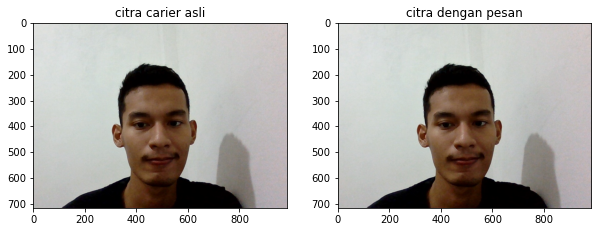

In [44]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2, figsize = (10,10))
axs[0].imshow(carier)
axs[0].set_title("citra carier asli")
axs[1].imshow(carier_encode)
axs[1].set_title("citra dengan pesan")
plt.show()

In [45]:
#decode
secret_carier = Image.open("pesan.png")
lebar, tinggi = secret_carier.size
pesan_rahasia = ""
index = 0
for x in range(lebar):
    for y in range(tinggi):
        r,g,b = secret_carier.getpixel((x,y))
        if x == 0 and y == 0:
            pjgpesan =r
        elif index <= pjgpesan:
            pesan_rahasia += chr(r)
        index += 1
pesan_rahasia

'windows 10 makan banyak ram dude'

In [46]:
from PIL import Image,ImageChops
img1 = Image.open("alfi.jpg")
img2 = Image.open("pesan.png")
diff = ImageChops.difference(img1,img2)
print(diff.getbbox())

(0, 0, 1, 33)


In [47]:
x,y = img2.size

In [48]:
if diff.getbbox():
    diff.show()

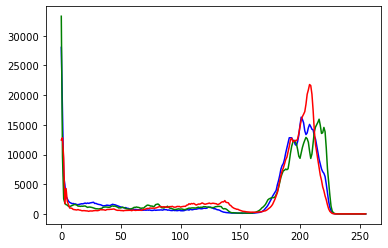

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgRgb = cv2.imread("pesan.png")
color = ["b","g","r"]
for i,col in enumerate(color):
    histr = cv2.calcHist([imgRgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.show()